In [1]:
from types import CodeType
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

figs_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/figs/"
inv_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/INVERTER/"
gti_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNminGTI/"
ghi_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/"

tzBRA = 'Etc/GMT+3'
tzETC = 'Etc/GMT-0'
                   
dcac = ['P_in1', 
        'P_grid'
        'I_in1']

GHIsensor = ['GHIP_SMP11',
             'F_GHIP_SMP11']

GTIsensor = ['TGIP_SMP11_VENT',
             'F_TGIP_SMP11_VENT']


In [29]:
tzBRA = 'Etc/GMT+3'
tzETC = 'Etc/GMT-0'
                   
dcac = ['P_in1', 
        'P_grid',
        'I_in1']

GHIsensor = ['GHIP_SMP11',
             'F_GHIP_SMP11']

GTIsensor = ['TGIP_SMP11_VENT',
             'F_TGIP_SMP11_VENT']

   

#months = ['2018-01','2018-02','2018-03', '2018-04','2018-05','2018-06','2018-07','2018-08', '2018-09','2018-10','2018-11','2018-12',
#          '2019-01','2019-02','2019-03', '2019-04','2019-05','2019-06','2019-07','2019-08', '2019-09','2019-10','2019-11','2019-12',
#          '2020-01','2020-02','2020-03', '2020-04','2020-05','2020-06','2020-07','2020-08', '2020-09','2020-10','2020-11','2020-12',
#          '2021-01']

## The procedure below was needed because on 27/11/18, the inverter datalogger was synchronized with the meteostation, thus changing from GMT-3 to GMT-00. 
# This will allow direct comparison with irradiance timestamps.

dfCDT  = pd.read_csv(inv_path + 'CDT.csv') 
dfCDT['TIMESTAMP'] = dfCDT['TIMESTAMP'].astype(np.datetime64)
dfCDT = dfCDT.drop_duplicates(subset=['TIMESTAMP'])
dfCDT = dfCDT.set_index('TIMESTAMP')
#dfCDT = dfCDT.index.drop_duplicates()
dfCDTnosync = dfCDT[dfCDT.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTnosync.index = dfCDTnosync.index.tz_localize(tzBRA)
dfCDTnosync.index = dfCDTnosync.index.tz_convert(tzETC)
dfCDTsync = dfCDT[dfCDT.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTsync.index = dfCDTsync.index.tz_localize(tzETC)
dfCDTsync = [dfCDTnosync, dfCDTsync]
dfCDTsync = pd.concat(dfCDTsync)
dfPCDT = dfCDTsync[dcac]
dfPCDT = dfPCDT.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDT = dfPCDT.rename(columns={"P_in1": "Pdccdt", "I_in1": "Idccdt", "P_grid": "Paccdt"})
dfPCDT.shape

dfCDTA  = pd.read_csv(inv_path + 'CDTA.csv') 
dfCDTA['TIMESTAMP'] = dfCDTA['TIMESTAMP'].astype(np.datetime64)
dfCDTA = dfCDTA.drop_duplicates(subset=['TIMESTAMP'])
dfCDTA = dfCDTA.set_index('TIMESTAMP')
dfCDTAnosync = dfCDTA[dfCDTA.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfCDTAnosync.index = dfCDTAnosync.index.tz_localize(tzBRA)
dfCDTAnosync.index = dfCDTAnosync.index.tz_convert(tzETC)
dfCDTAsync = dfCDTA[dfCDTA.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfCDTAsync.index = dfCDTAsync.index.tz_localize(tzETC)
dfCDTAsync = [dfCDTAnosync, dfCDTAsync]
dfCDTAsync = pd.concat(dfCDTAsync)
dfPCDTA = dfCDTAsync[dcac]
dfPCDTA = dfPCDTA.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPCDTA = dfPCDTA.rename(columns={"P_in1": "Pdccdta", "I_in1": "Idccdta","P_grid": "Paccdta"})
dfPCDTA.shape



dfPSI  = pd.read_csv(inv_path + 'PSI.csv') 
dfPSI['TIMESTAMP'] = dfPSI['TIMESTAMP'].astype(np.datetime64)
dfPSI = dfPSI.drop_duplicates(subset=['TIMESTAMP'])
dfPSI = dfPSI.set_index('TIMESTAMP')
#dfPSI = dfPSI.index.drop_duplicates()
dfPSInosync = dfPSI[dfPSI.index < '2018-11-27 00:00:00']  # this part is in BRT (GMT - 3)
dfPSInosync.index = dfPSInosync.index.tz_localize(tzBRA)
dfPSInosync.index = dfPSInosync.index.tz_convert(tzETC)
dfPSIsync = dfPSI[dfPSI.index > '2018-11-28 00:00:00']  #  # this part is in  (GMT - 0)
dfPSIsync.index = dfPSIsync.index.tz_localize(tzETC)
dfPSIsync = [dfPSInosync, dfPSIsync]
dfPSIsync = pd.concat(dfPSIsync)
dfPPSI = dfPSIsync[dcac]
dfPPSI = dfPPSI.loc['2018-01-01 00:00:00':'2021-01-01 00:00:00']
dfPPSI = dfPPSI.rename(columns={"P_in1": "Pdcpsi", "I_in1": "Idcpsi","P_grid": "Pacpsi"})
dfPPSI.shape



pvsi = pd.merge(dfPCDT,dfPCDTA, how = 'left',left_index = True, right_index = True)
pvsi = pd.merge(pvsi,dfPPSI, how = 'left',left_index = True, right_index = True)

In [5]:
pvsi

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi
TIMESTAMP,,,,,,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
dfgti18 = pd.read_pickle(gti_path + '2018' +'gtiFLAG.pkl')
dfgti19 = pd.read_pickle(gti_path + '2019' +'gtiFLAG.pkl')
dfgti20 = pd.read_pickle(gti_path + '2020' +'gtiFLAG.pkl')
dfgtis = [dfgti18[GTIsensor], dfgti19[GTIsensor], dfgti20[GTIsensor]]
dfgtis = pd.concat(dfgtis)
dfgtis = dfgtis[dfgtis.F_TGIP_SMP11_VENT < 4]

dfghi18 = pd.read_pickle(ghi_path + '2018' +'ghiFLAG.pkl')
dfghi19 = pd.read_pickle(ghi_path + '2019' +'ghiFLAG.pkl')
dfghi20 = pd.read_pickle(ghi_path + '2020' +'ghiFLAG.pkl')
dfghis = [dfghi18[GHIsensor], dfghi19[GHIsensor], dfghi20[GHIsensor]]
dfghis = pd.concat(dfghis)
dfghis = dfghis[dfghis.F_GHIP_SMP11 < 4]


dfirad = pd.merge(dfgtis,dfghis, how = 'inner',left_index = True, right_index = True)

pxir = pd.merge(pvsi,dfirad, how = 'inner',left_index = True, right_index = True)


<AxesSubplot:>

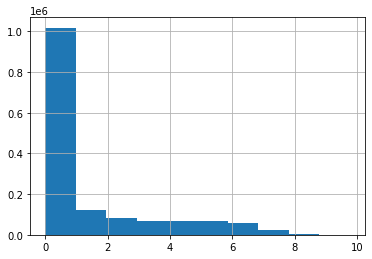

In [8]:
pxir.Idccdta.hist()

In [11]:
pxir.Idccdta.describe()

count    1.504513e+06
mean     1.256454e+00
std      1.998649e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.862961e+00
max      9.766766e+00
Name: Idccdta, dtype: float64

In [42]:
pxir['Idccdta4'] = pxir.Idccdta/4

In [43]:
pxir['Idccdt4'] = pxir.Idccdt/4

In [34]:
pxir.Idccdta4.max()

2.4416915

In [36]:
pxir.Idccdt4.max()

2.43958375

<AxesSubplot:>

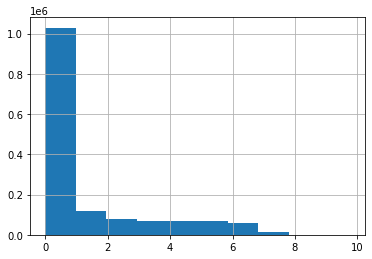

In [9]:
pxir.Idccdt.hist()

In [13]:
pxir.Idccdt.describe()

count    1.504513e+06
mean     1.226333e+00
std      1.964123e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.757265e+00
max      9.758335e+00
Name: Idccdt, dtype: float64

<AxesSubplot:>

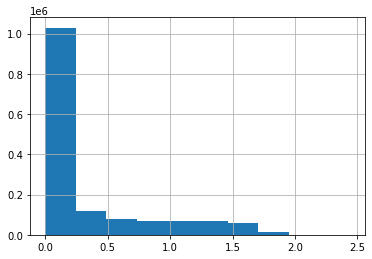

In [37]:
pxir.Idccdt4.hist()

In [41]:
pxir.Idccdt4

2018-01-01 00:00:00+00:00    0.0
2018-01-01 00:01:00+00:00    0.0
2018-01-01 00:02:00+00:00    0.0
2018-01-01 00:03:00+00:00    0.0
2018-01-01 00:04:00+00:00    0.0
                            ... 
2020-12-31 23:55:00+00:00    0.0
2020-12-31 23:56:00+00:00    0.0
2020-12-31 23:57:00+00:00    0.0
2020-12-31 23:58:00+00:00    0.0
2020-12-31 23:59:00+00:00    0.0
Name: Idccdt, Length: 1504513, dtype: float64

<AxesSubplot:>

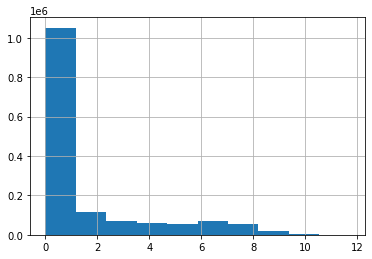

In [10]:
pxir.Idcpsi.hist()

In [14]:
pxir.Idcpsi.describe()

count    1.503821e+06
mean     1.427087e+00
std      2.379278e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.884035e+00
max      1.171618e+01
Name: Idcpsi, dtype: float64

In [15]:
oielist1 = [ '2018-01-11 15:54:00+00:00', '2018-12-15 14:35:00+00:00',  # ghi highest longest SiO2
            '2018-01-11 15:54:00+00:00', '2018-12-15 14:35:00+00:00',  # ghi highest longest SMP11 / SMP22
            '2018-12-15 14:35:00+00:00', '2018-12-15 14:29:00+00:00',  # ghi highest longest SPN1
            '2019-02-12 12:53:00+00:00', '2019-01-12 14:11:00+00:00',  # ghi highest longest SiO2 - SMP11 - SMP22 - SPN1
            '2019-01-16 15:17:00+00:00', # ghi second longest SPN1
            '2020-12-24 16:10:00+00:00', '2020-12-25 13:27:00+00:00',  # ghi highest longest SiO2
            '2020-12-24 16:10:00+00:00', '2020-01-07 15:22:00+00:00',  # ghi highest longest SMP11 / SMP22
            '2020-11-12 14:59:00+00:00',  # ghi highest longest SPN1
            '2018-02-14 15:35:00+00:00', '2018-02-16 15:02:00+00:00',  # gti highest longest SiO2 - SMP11
            '2019-02-12 15:30:00+00:00', '2019-01-12 14:11:00+00:00',  # gti highest longest SiO2 - really high here
            '2019-01-12 14:11:00+00:00', # gti highest and longest SMP11
            '2020-11-12 15:01:00+00:00', '2020-11-12 15:01:00+00:00',  # gti highest longest SiO2
            '2020-11-02 15:24:00+00:00', '2020-10-17 15:13:00+00:00',]   # gti highest longest SMP11 
          

#2020-11-19 12:42:00 - CdTe A
#2020-01-10 14:52:00	

#2020-01-10 11:50:00	- PSI
#2020-01-10 14:50:00	

#2020-11-19 12:42:00 - CDTE 	
#2020-11-19 15:42:00	

#### INTERRESTING EVENTS:

oielist2 = ['2020-01-10 14:52:00+00:00',	
           '2020-01-10 14:50:00+00:00',
           '2020-11-19 15:42:00+00:00']	#inverter highest dc power peaks
	

oielist3 = ['2019-02-05 14:25:00+00:00',	
           '2018-11-24 13:24:00+00:00',
           '2019-03-14 15:07:00+00:00']	#inverter worst eff    

oielist4 = ['2020-11-19 15:42:00+00:00',	
           '2020-01-10 14:51:00+00:00',
           '2019-09-23 16:15:00+00:00']   #inverter highest ac power peaks	

deltas = [5,30]
max_out = 2750
sc = 1361.1
fusecdte = 4
fusesi = 15


In [48]:
### PLOTS -  P_DC I_DC P_AC GHI:


for oie in oielist4:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt4'].loc[start:end].plot(ax=axes[2],color = 'orange',label='AVG String Current - CdTe')
              l3=axes[2].axhline(fusecdte,color='red',ls='--')
              l3.set_label('Max Fuse rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdta4'].loc[start:end].plot(ax=axes[2],color = 'orange',label='AVG String Current - CdTe ARC')
              l3=axes[2].axhline(fusecdte,color='red',ls='--')
              l3.set_label('Max Fuse Rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt'].loc[start:end].plot(ax=axes[2],color = 'orange',label='String Current - mc Si')
              l3=axes[2].axhline(fusesi,color='red',ls='--')
              l3.set_label('Max Fuse Rating')
              axes[2].legend(loc='best')


              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()




<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>


for oie in oielist4:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt'].loc[start:end].plot(ax=axes[2],color = 'purple',label='DC Current - CdTe')
              l3=axes[2].axhline(fuse,color='red',ls='--')
              l3.set_label('Current rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdta'].loc[start:end].plot(ax=axes[2],color = 'purple',label='DC Current - CdTe ARC')
              l3=axes[2].axhline(fuse,color='red',ls='--')
              l3.set_label('Current rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt'].loc[start:end].plot(ax=axes[2],color = 'purple',label='DC Current - mc Si')
              l3=axes[2].axhline(fuse,color='red',ls='--')
              l3.set_label('Current rating')
              axes[2].legend(loc='best')


              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()



In [49]:
deltas = [6]
fusecdte = 4
fusesi = 15

oielist5 = ['2019-04-24 15:00:00+00:00',
            '2019-01-20 15:00:00+00:00',]

for oie in oielist5:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt4'].loc[start:end].plot(ax=axes[2],color = 'orange',label='AVG String Current - CdTe')
              l3=axes[2].axhline(fusecdte,color='red',ls='--')
              l3.set_label('Max Fuse rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdta4'].loc[start:end].plot(ax=axes[2],color = 'orange',label='AVG String Current - CdTe ARC')
              l3=axes[2].axhline(fusecdte,color='red',ls='--')
              l3.set_label('Max Fuse Rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt'].loc[start:end].plot(ax=axes[2],color = 'orange',label='String Current - mc Si')
              l3=axes[2].axhline(fusesi,color='red',ls='--')
              l3.set_label('Max Fuse Rating')
              axes[2].legend(loc='best')


              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [50]:
oielist6 = ['2019-09-23 15:00:00+00:00',
            '2019-03-11 15:00:00+00:00',]

for oie in oielist6:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt4'].loc[start:end].plot(ax=axes[2],color = 'orange',label='AVG String Current - CdTe')
              l3=axes[2].axhline(fusecdte,color='red',ls='--')
              l3.set_label('Max Fuse rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdta4'].loc[start:end].plot(ax=axes[2],color = 'orange',label='AVG String Current - CdTe ARC')
              l3=axes[2].axhline(fusecdte,color='red',ls='--')
              l3.set_label('Max Fuse Rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt'].loc[start:end].plot(ax=axes[2],color = 'orange',label='String Current - mc Si')
              l3=axes[2].axhline(fusesi,color='red',ls='--')
              l3.set_label('Max Fuse Rating')
              axes[2].legend(loc='best')


              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [51]:
deltas = [1]
fusecdte = 4
fusesi = 15

oielist5 = ['2019-04-24 15:00:00+00:00',
            '2019-01-20 15:00:00+00:00',]

for oie in oielist5:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt4'].loc[start:end].plot(ax=axes[2],color = 'orange',label='AVG String Current - CdTe')
              l3=axes[2].axhline(fusecdte,color='red',ls='--')
              l3.set_label('Max Fuse rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdta4'].loc[start:end].plot(ax=axes[2],color = 'orange',label='AVG String Current - CdTe ARC')
              l3=axes[2].axhline(fusecdte,color='red',ls='--')
              l3.set_label('Max Fuse Rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt'].loc[start:end].plot(ax=axes[2],color = 'orange',label='String Current - mc Si')
              l3=axes[2].axhline(fusesi,color='red',ls='--')
              l3.set_label('Max Fuse Rating')
              axes[2].legend(loc='best')


              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [53]:
pxir['Idccdt4'].max()

2.43958375

In [56]:
pxir['Idccdta4'].max()

2.4416915

In [58]:
pxir['Idcpsi'].max()

11.71618

In [52]:
oielist6 = ['2019-09-23 14:35:00+00:00',
            '2019-03-11 14:25:00+00:00',]

deltas = [15]

for oie in oielist6:
       for delta in deltas:
              event = pd.to_datetime(oie)
              start = event - datetime.timedelta(minutes=delta)
              end = event + datetime.timedelta(minutes=delta)

              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdt'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdt'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt4'].loc[start:end].plot(ax=axes[2],color = 'orange',label='AVG String Current - CdTe')
              l3=axes[2].axhline(fusecdte,color='red',ls='--')
              l3.set_label('Max Fuse rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTe.jpeg'
              fig.savefig(figname)
              fig.clf()


              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdccdta'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - CdTe ARC')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Paccdta'].loc[start:end].plot(ax=axes[1],label='AC Power - CdTe ARC')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdta4'].loc[start:end].plot(ax=axes[2],color = 'orange',label='AVG String Current - CdTe ARC')
              l3=axes[2].axhline(fusecdte,color='red',ls='--')
              l3.set_label('Max Fuse Rating')
              axes[2].legend(loc='best')

              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd' + str(delta) + 'CdTeA.jpeg'
              fig.savefig(figname)
              fig.clf()

              
              fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(20,10))

              f1= pxir['Pdcpsi'].loc[start:end].plot(ax=axes[0],color = 'green',label='DC Power - mcSi')
              l1=axes[0].axhline(max_out,color='red',ls='--')
              l1.set_label('Max Output')
              axes[0].legend(loc='best')

              f2= pxir['Pacpsi'].loc[start:end].plot(ax=axes[1],label='AC Power - mcSi')
              l2=axes[1].axhline(max_out,color='red',ls='--')
              l2.set_label('Max Output')
              axes[1].legend(loc='best')

              f3 = pxir['Idccdt'].loc[start:end].plot(ax=axes[2],color = 'orange',label='String Current - mc Si')
              l3=axes[2].axhline(fusesi,color='red',ls='--')
              l3.set_label('Max Fuse Rating')
              axes[2].legend(loc='best')


              f4 = pxir['GHIP_SMP11'].loc[start:end].plot(ax=axes[3],color = 'salmon',label='GHI - SMP11')
              l4=axes[3].axhline(sc,color='red',ls='--')
              l4.set_label('Solar Constant')
              axes[3].legend(loc='best')

              figname =  figs_path + oie + 'd'+ str(delta) + 'PSI.jpeg'
              fig.savefig(figname)
              fig.clf()


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [59]:
pxir

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,Idccdta4,Idccdt4
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.823333,0,-2.200000,1,0.0,0.0
2018-01-01 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.183333,1,0.0,0.0
2018-01-01 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.800000,0,-2.185000,1,0.0,0.0
2018-01-01 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.890000,0,-2.246667,1,0.0,0.0
2018-01-01 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.105000,0,-2.650000,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:55:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.770000,3,0.0,0.0
2020-12-31 23:56:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.776667,3,0.0,0.0
2020-12-31 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.103333,0,-4.793333,3,0.0,0.0
2020-12-31 23:58:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.100000,0,-4.800000,3,0.0,0.0


In [61]:
pxir[pxir.Idccdt == pxir.Idccdt.max()]

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,Idccdta4,Idccdt4
2018-02-16 15:07:00+00:00,2723.936,2642.218,9.758335,2807.717,2709.319,9.554294,2381.143,2307.797,11.6053,923.222222,0,925.777778,0,2.388574,2.439584


In [62]:
pxir[pxir.Idccdta == pxir.Idccdta.max()]

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,Idccdta4,Idccdt4
2018-01-15 16:10:00+00:00,0.0,0.0,0.0,2762.73,2679.848,9.766766,2348.882,2280.009,11.24899,1427.066667,0,1503.516667,0,2.441692,0.0


In [63]:
pxir[pxir.Idcpsi == pxir.Idcpsi.max()]

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,Idccdta4,Idccdt4
2018-01-15 15:30:00+00:00,2670.059,2597.988,9.199815,2726.088,2658.029,9.044946,2423.194,2350.498,11.71618,832.851667,0,880.4,0,2.261236,2.299954


In [64]:
pxir[pxir.Pdccdt == pxir.Pdccdt.max()]

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,Idccdta4,Idccdt4
2020-11-19 15:42:00+00:00,2819.724,2737.014,9.013929,1478.049,1497.457,4.620766,1363.909,1322.992,5.131734,945.566667,0,1028.195,0,1.155192,2.253482


In [65]:
pxir[pxir.Pdccdta == pxir.Pdccdta.max()]

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,Idccdta4,Idccdt4
2020-01-10 14:52:00+00:00,2573.56,2417.304,8.991018,2825.712,2733.352,8.402452,1398.141,1353.329,5.619251,1375.283333,0,1453.1,0,2.100613,2.247755


In [66]:
pxir[pxir.Pdcpsi == pxir.Pdcpsi.max()]

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,Idccdta4,Idccdt4
2020-01-10 14:50:00+00:00,1675.123,1623.928,5.704953,2011.768,1953.818,5.95352,2825.304,2739.397,9.982695,1379.838333,0,1452.771667,0,1.48838,1.426238


In [68]:
pxir[pxir.Paccdt == pxir.Paccdt.max()]

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,Idccdta4,Idccdt4
2020-11-19 15:42:00+00:00,2819.724,2737.014,9.013929,1478.049,1497.457,4.620766,1363.909,1322.992,5.131734,945.566667,0,1028.195,0,1.155192,2.253482


In [69]:
pxir[pxir.Paccdta == pxir.Paccdta.max()]

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,Idccdta4,Idccdt4
2020-01-10 14:51:00+00:00,2196.619,2093.329,7.643565,2821.8,2741.889,8.54835,1439.206,1396.03,5.673828,883.845,0,929.178333,0,2.137087,1.910891


In [70]:
pxir[pxir.Pacpsi == pxir.Pacpsi.max()]

,Pdccdt,Paccdt,Idccdt,Pdccdta,Paccdta,Idccdta,Pdcpsi,Pacpsi,Idcpsi,TGIP_SMP11_VENT,F_TGIP_SMP11_VENT,GHIP_SMP11,F_GHIP_SMP11,Idccdta4,Idccdt4
2019-09-23 16:15:00+00:00,1536.584,1487.287,4.983242,2618.705,2536.982,8.034788,2821.756,2743.986,10.21678,946.183333,0,859.941667,0,2.008697,1.24581


In [71]:
oie

'2019-03-11 14:25:00+00:00'